# Data Exploration

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('KSI.csv')

In [16]:
# rows and columns
print(df.shape)

(18194, 57)


In [ ]:
print(df.head())

In [17]:
# column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [18]:
# statistical summary (mean, std, min, max, etc.)
print(df.describe())

                  X             Y        INDEX_        ACCNUM          YEAR  \
count  1.819400e+04  1.819400e+04  1.819400e+04  1.326400e+04  18194.000000   
mean  -8.838345e+06  5.420748e+06  3.818870e+07  4.248444e+08   2012.934869   
std    1.162533e+04  8.682160e+03  3.726463e+07  1.065503e+09      4.754258   
min   -8.865305e+06  5.402162e+06  3.363207e+06  2.530100e+04   2006.000000   
25%   -8.846591e+06  5.413242e+06  5.391370e+06  1.021229e+06   2009.000000   
50%   -8.838448e+06  5.419556e+06  7.644612e+06  1.197308e+06   2012.000000   
75%   -8.829671e+06  5.427813e+06  8.078261e+07  1.365020e+06   2017.000000   
max   -8.807929e+06  5.443099e+06  8.170606e+07  4.008024e+09   2022.000000   

               TIME       WARDNUM      LATITUDE     LONGITUDE    FATAL_NO  \
count  18194.000000  1.733200e+04  18194.000000  18194.000000  827.000000   
mean    1362.615917  2.521028e+03     43.710459    -79.396201   29.073761   
std      630.816048  1.844803e+05      0.056369      0.10

In [19]:
# null values
print(df.isnull().sum())

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                1611
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

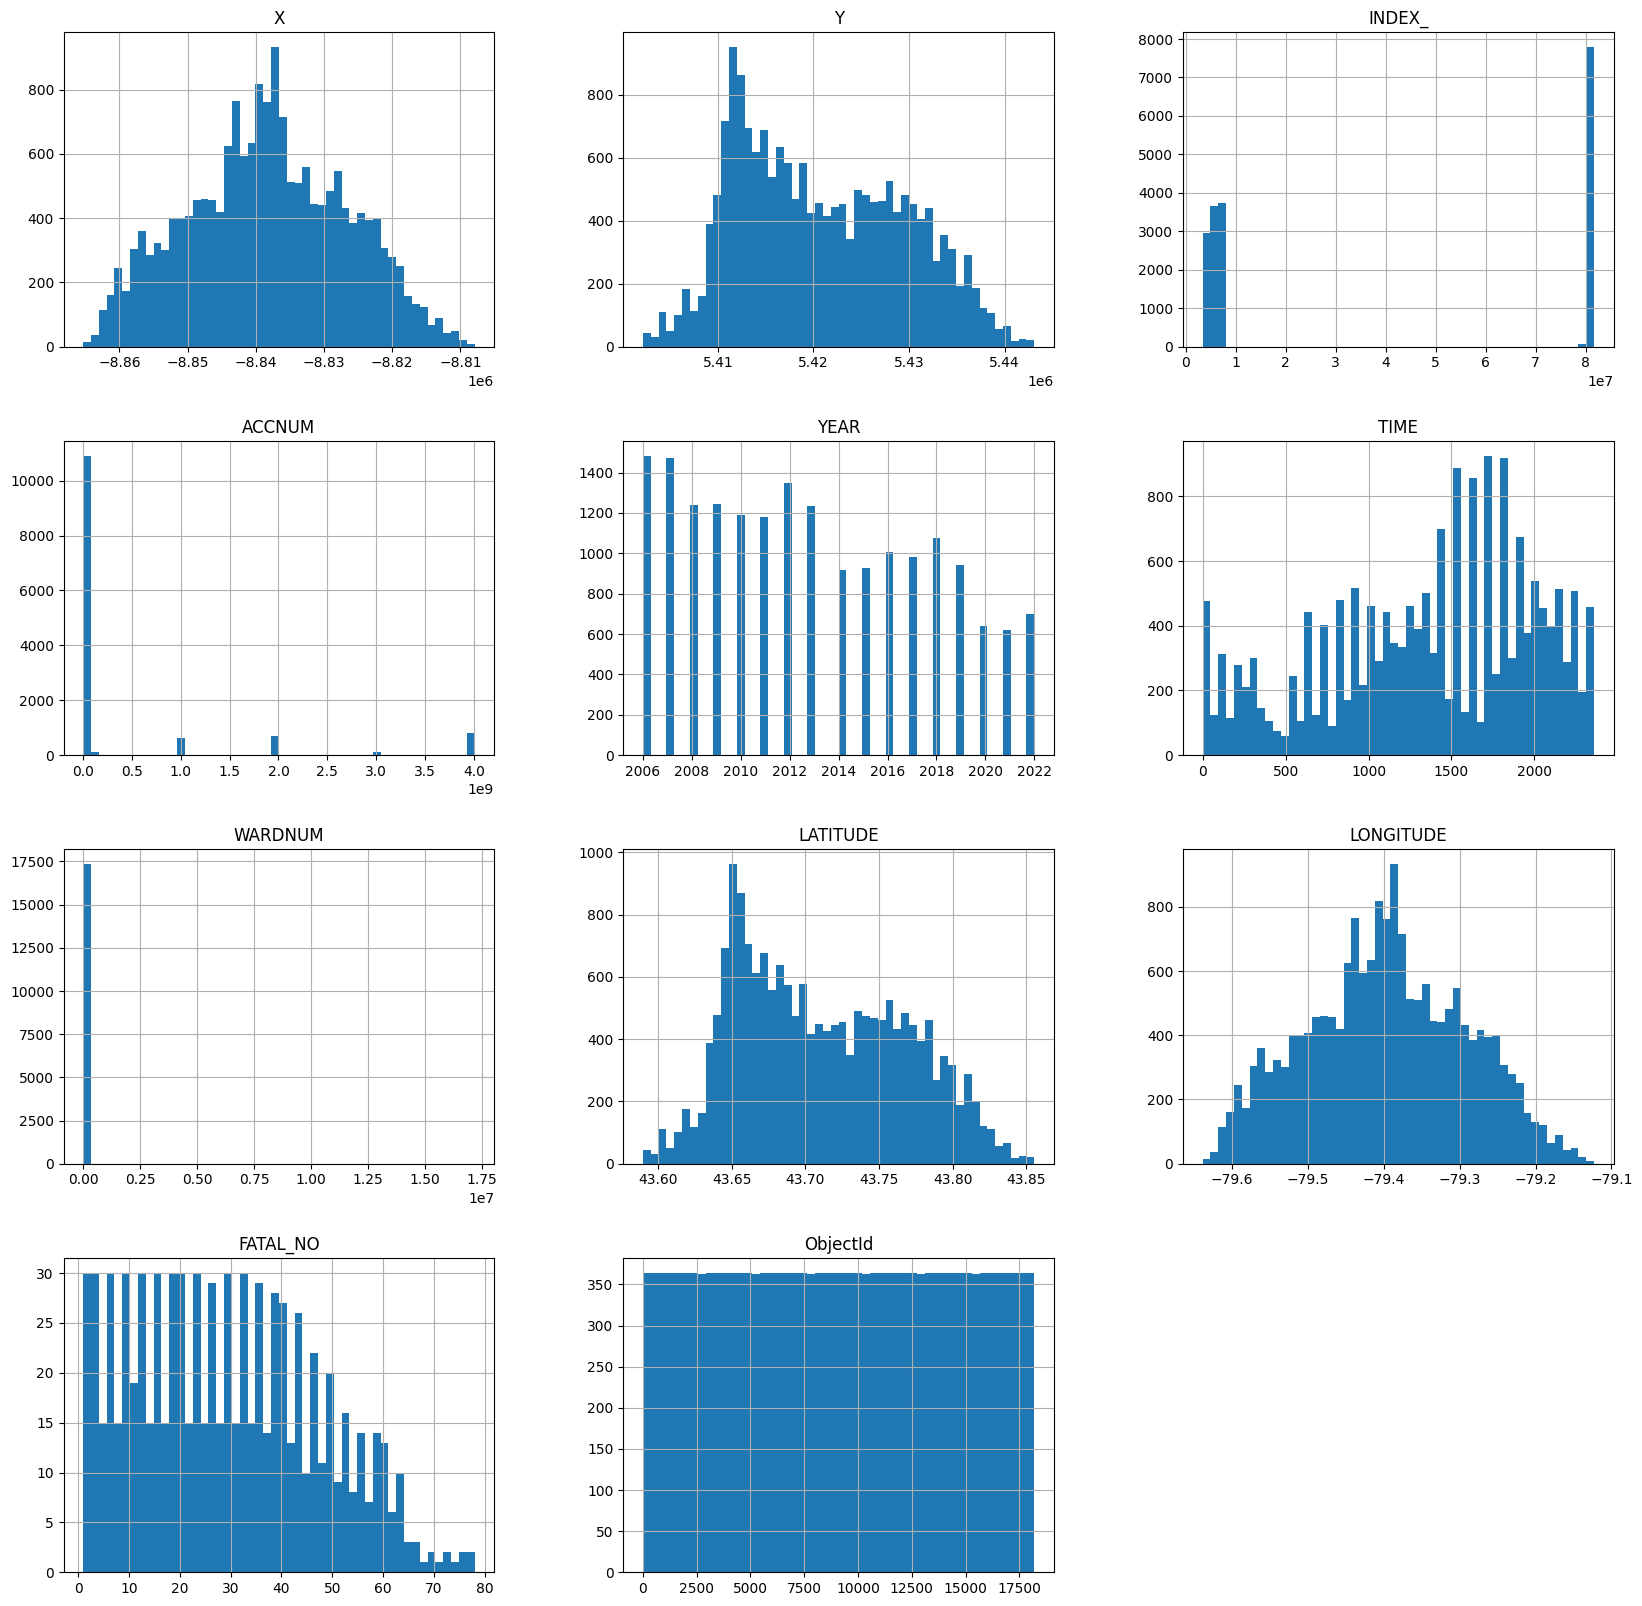

/var/folders/c1/yp0kk1l91zg23vyrp6ctf6h00000gn/T/ipykernel_97878/3317987710.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


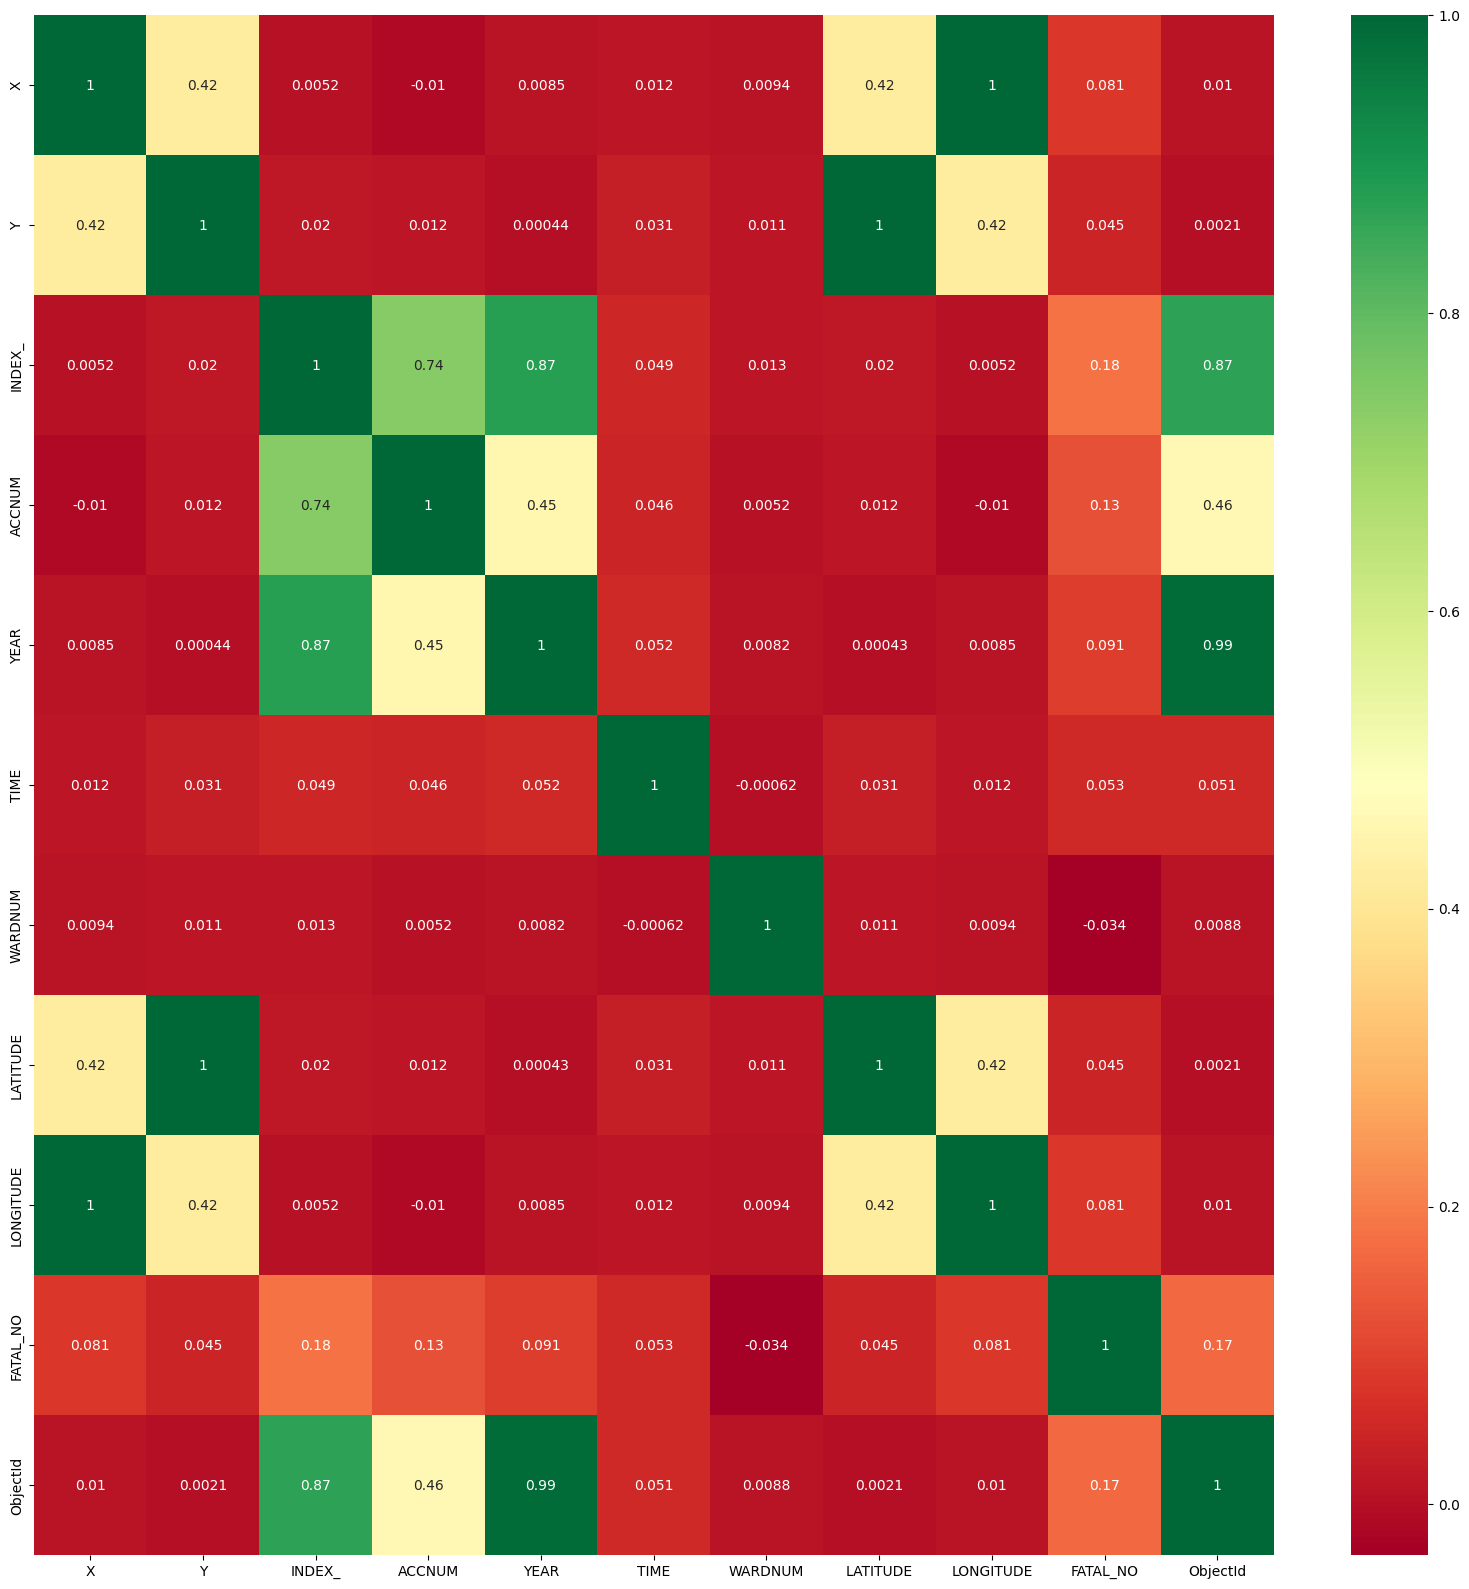

In [20]:
# Plot histogram
df.hist(bins=50, figsize=(20, 20))
plt.show()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()


In [21]:
# Double check if we need to use these columns to train the model based on the requirement
# yes and no columns
bool_cols = [df.columns[col] for col in range(38, 51)]

# Fill missing values with 'No' in boolean columns
df[bool_cols] = df[bool_cols].fillna('No')

In [22]:
# Drop columns having more than 80% missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percentages[missing_percentages > 80].index
df = df.drop(columns=columns_to_drop)

In [23]:
# From correlation matrix, we can see that 'X' and 'LONGITUDE', 'Y' and 'LATITUDE' are highly correlated.
# So, we will drop x and y columns
columns_to_drop = ['X', 'Y']
df = df.drop(columns=columns_to_drop)

In [24]:
# Drop columns which may not be useful for analysis
# 'ObjectId' and 'INDEX_' are unique identifiers and not useful for analysis
# 'ACCNUM' is also unique identifier and not useful for analysis
# initial direction of vehicle 'INITDIR' is not useful for analysis
# we dont need street names 'STREET1' and 'STREET2' for analysis beacasue we have 'neighbourhood' column
# 'DISTRICT' and 'WARDNUM' are not useful for analysis beacuse we have 'neighbourhood' column
# unique identifier 'DIVISION' is not useful for analysis
# 'HOOD_158' and 'HOOD_140' are not useful for analysis because they are unique identifiers
# 'INJURY' is not useful for analysis because it is the target variable
columns_to_drop = ['ObjectId', 'INDEX_', 'ACCNUM', 'INITDIR', 'STREET1',
                   'STREET2', 'DISTRICT', 'WARDNUM', 'DIVISION', 'HOOD_158', 'HOOD_140', 'INJURY']
# 'INJURY' feature which might be dropped depends on the accuracy score of model
df = df.drop(columns=columns_to_drop)

In [26]:
# In 'NEIGHBOURHOOD_140', the values contain number inside brackets. We can remove the number inside brackets.
df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].str.replace(r"\(.*\)", "")

/var/folders/c1/yp0kk1l91zg23vyrp6ctf6h00000gn/T/ipykernel_97878/3467883401.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].str.replace(r"\(.*\)", "")


In [29]:
# Convert 'property' to 'non fatal'
df['ACCLASS'] = df['ACCLASS'].str.replace(
    "Property Damage Only", "Non-Fatal Injury")

In [33]:
# columns <3% missing values from the categorical, drop it

print(df.shape)

(18194, 35)
